In [20]:
import torch
from torchvision import datasets
data_folder = '~/data/FMNIST'
#you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train= True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting C:\Users\DC/data/FMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\DC/data/FMNIST\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting C:\Users\DC/data/FMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\DC/data/FMNIST\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting C:\Users\DC/data/FMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\DC/data/FMNIST\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting C:\Users\DC/data/FMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\DC/data/FMNIST\FashionMNIST\raw



In [21]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [22]:
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX -{tr_images.shape}\n\tY-{tr_targets.shape}\n\tY - unique_values : {unique_values}')
print(f'Task:\n\t{len(unique_values)} class classification')
print(f'UNIQUE CLASSES: \n\t{fmnist.classes}')

tr_images & tr_targets:
	X -torch.Size([60000, 28, 28])
	Y-torch.Size([60000])
	Y - unique_values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Task:
	10 class classification
UNIQUE CLASSES: 
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [23]:
# importing random 10 images
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

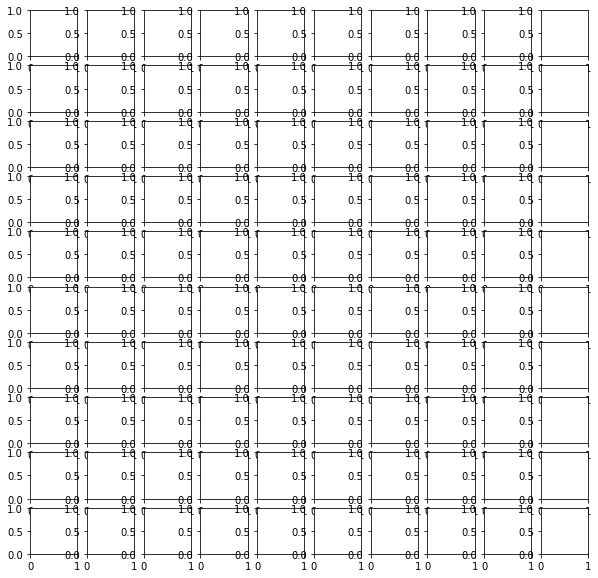

In [24]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]

In [25]:
for plot_cell in plot_row:
    plot_cell.grid(False); plot_cell.axis('off')
    ix = np.random.choice(label_x_rows)
    x, y = tr_images[ix], tr_targets[ix]
    plot_cell.imshow(x, cmap='gray')
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

## Training a Neural Network

In [26]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
device = "cuda" if torch.cuda.is_available() else "cpu"

In [34]:
# fetch the dataset
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1, 28*28)
        self.x, self.y = x,y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [35]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size= 32, shuffle=True)
    return trn_dl

In [36]:
from torch.optim import SGD
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr = 1e-2)
    return model, loss_fn, optimizer

In [37]:
# function to train the dataset
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [38]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [39]:
#Initialize the model, loss, optimizer, and DataLoaders
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [40]:
losses, accuracies = [], []
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


C:\Users\DC\AppData\Local\Temp\ipykernel_19172\1668084199.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


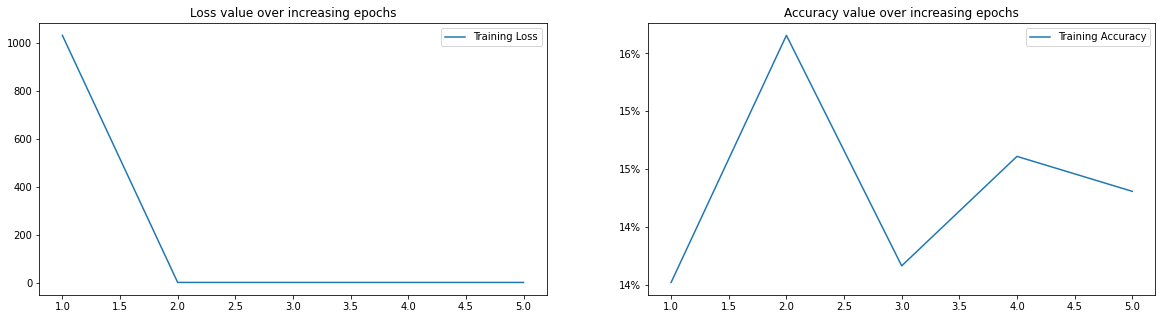

In [41]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()